nDisplaying image with Image Name: apple1.jpg


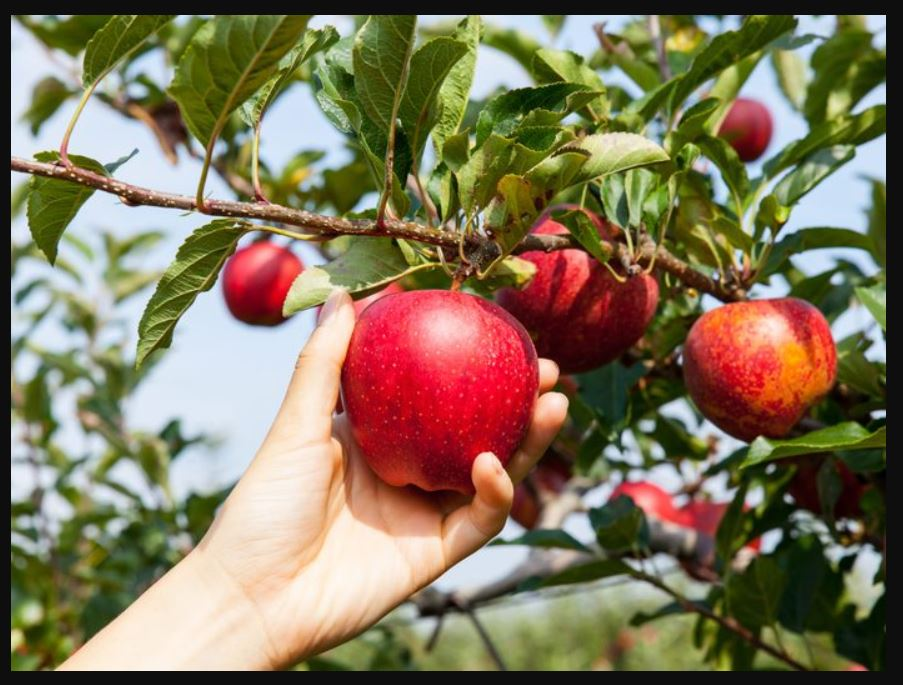

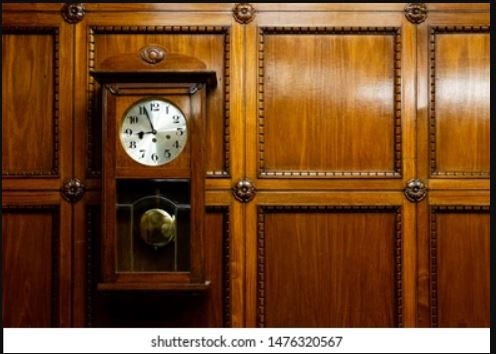

nDisplaying image with Image Name: clock_wall.jpg


In [1]:
from IPython.display import Image, display
# Some example images
image_files = [
    'apple1.jpg',
    'clock_wall.jpg'
]
for image_file in image_files:
    print(f"nDisplaying image with Image Name: {image_file}")
    display(Image(filename=f"images/{image_file}"))

In [2]:
import os
dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [3]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.6):
    """Detects common objects on an image and creates a new image with bounding boxes.
    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.6.
    """
    # Images are stored under the images/ directory
    img_filepath = f'images/{filename}'
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
     # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    # Print current image's filename
    print(f"========================nImage processed: {filename}n")
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}n")
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    # Display the image with bounding boxes
    display(Image(f'images_with_boxes/{filename}'))

========================nImage processed: apple1.jpgn
Detected object: apple with confidence level of 0.6702946424484253n
Detected object: apple with confidence level of 0.6577218770980835n
Detected object: apple with confidence level of 0.6359063386917114n


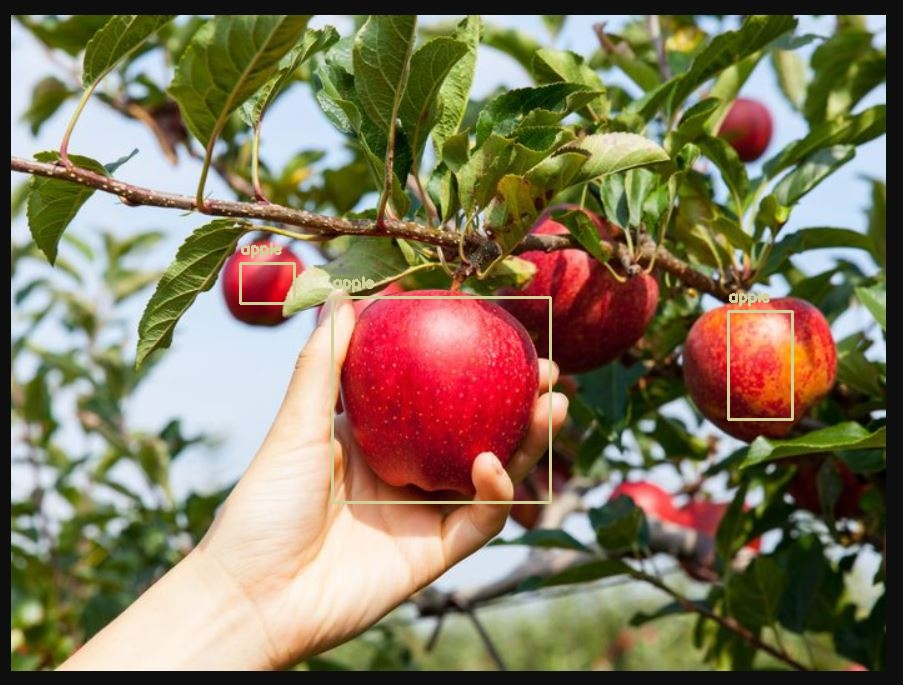

========================nImage processed: clock_wall.jpgn
Detected object: clock with confidence level of 0.7699185609817505n
Detected object: clock with confidence level of 0.6434584259986877n


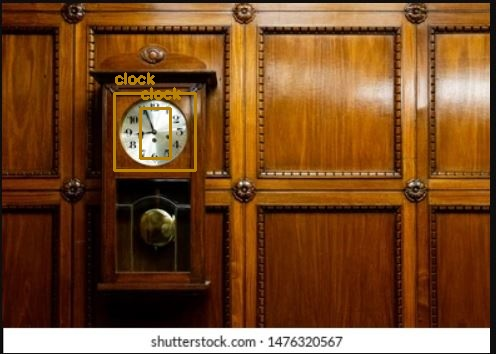

In [4]:
for image_file in image_files:
    detect_and_draw_box(image_file)

========================nImage processed: apple1.jpgn
Detected object: apple with confidence level of 0.6702946424484253n
Detected object: apple with confidence level of 0.6577218770980835n
Detected object: apple with confidence level of 0.6359063386917114n
Detected object: apple with confidence level of 0.5868645906448364n
Detected object: apple with confidence level of 0.4117852449417114n


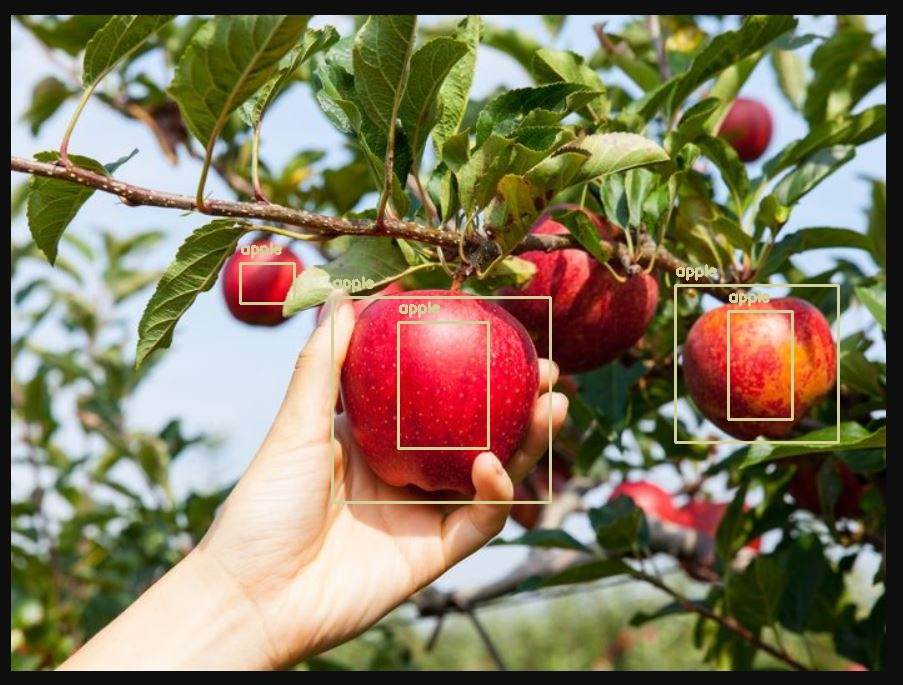

In [5]:
detect_and_draw_box("apple1.jpg", confidence=0.2)